<a href="https://colab.research.google.com/github/layn1asol/layn1asol/blob/main/DA_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу, записати у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Побудувати діаграми розмаху та гістограми.
4. Заповнити пропуски.
5. Додати стовпчик із щільністю населення.



<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [5]:
import pandas as pd
import matplotlib.pylab as plt

DATA_PATH = '/content/Data2.csv'
df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)

print(df.head(10))
print('....................................')
df.info()
print('....................................')
df.describe(include = "all")

          Country Name                      Region GDP per capita  Population  \
0          Afghanistan                  South Asia    561,7787463  34656032.0   
1              Albania       Europe & Central Asia     4124,98239   2876101.0   
2              Algeria  Middle East & North Africa    3916,881571  40606052.0   
3       American Samoa         East Asia & Pacific    11834,74523     55599.0   
4              Andorra       Europe & Central Asia    36988,62203     77281.0   
5               Angola          Sub-Saharan Africa    3308,700233  28813463.0   
6  Antigua and Barbuda   Latin America & Caribbean    14462,17628    100963.0   
7            Argentina   Latin America & Caribbean    12440,32098  43847430.0   
8              Armenia       Europe & Central Asia    3614,688357   2924816.0   
9                Aruba   Latin America & Caribbean            NaN    104822.0   

  CO2 emission     Area  
0     9809,225   652860  
1     5716,853    28750  
2   145400,217  2381740  
3   

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
count,217,217,190,2.160000e+02,205,217
unique,217,7,190,NaN,202,213
top,Afghanistan,Europe & Central Asia,"561,7787463",NaN,"6318,241",460
freq,1,58,1,NaN,2,3
mean,NaN,NaN,NaN,3.432256e+07,NaN,NaN
std,NaN,NaN,NaN,1.347600e+08,NaN,NaN
min,NaN,NaN,NaN,1.109700e+04,NaN,NaN
25%,NaN,NaN,NaN,7.900265e+05,NaN,NaN
50%,NaN,NaN,NaN,6.221590e+06,NaN,NaN
75%,NaN,NaN,NaN,2.350337e+07,NaN,NaN


Бачу наступні проблеми в даних:
1. Неправильна назва колонки "Population".
2. Коми у числах, замість крапки.
3. У колонках, де має бути число, тип не float (або int), а object.
4. Є пропущені значення в ознаках "GDP per capita", "Population", "CO2 emission".


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1. Неправильні назви</b>
<p>
    Для виправлення зроблю наступне:
    Переіменую колонку "Populatiion" в "Population" за допомогою rename.
</p>
<p>   Перевіряю результат.</p>

In [53]:
df.rename(columns={"Populatiion": "Population"}, inplace=True)
df.head(1)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860


<b>Проблема 2. Неправильні типи даних</b>
<p>
    Відкрию файл даних поряд у вікні текстового редактора і постараюсь розібратись, чому типи даних визначились неправильно. </p>
<p>Для виправлення зроблю наступне (опишіть, що хочете зробити)
</p>
<p>   Перевіряю результат.</p>

In [60]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import numpy as np

df["Population"] = df["Population"].astype("str").str.replace(',', '.').astype("float")
df["GDP per capita"] = df["GDP per capita"].astype("str").str.replace(',', '.').astype("float")
df["CO2 emission"] = df["CO2 emission"].astype("str").str.replace(',', '.').astype("float")
print(df.head(10))
print('....................................')
df.info()
print('....................................')
df.describe(include = "all")

          Country Name                      Region  GDP per capita  \
0          Afghanistan                  South Asia      561.778746   
1              Albania       Europe & Central Asia     4124.982390   
2              Algeria  Middle East & North Africa     3916.881571   
3       American Samoa         East Asia & Pacific    11834.745230   
4              Andorra       Europe & Central Asia    36988.622030   
5               Angola          Sub-Saharan Africa     3308.700233   
6  Antigua and Barbuda   Latin America & Caribbean    14462.176280   
7            Argentina   Latin America & Caribbean    12440.320980   
8              Armenia       Europe & Central Asia     3614.688357   
9                Aruba   Latin America & Caribbean             NaN   

   Population  CO2 emission     Area  
0  34656032.0      9809.225   652860  
1   2876101.0      5716.853    28750  
2  40606052.0    145400.217  2381740  
3     55599.0           NaN      200  
4     77281.0       462.042      4

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
count,217,217,190.000000,2.160000e+02,2.050000e+02,217
unique,217,7,NaN,NaN,NaN,213
top,Afghanistan,Europe & Central Asia,NaN,NaN,NaN,460
freq,1,58,NaN,NaN,NaN,3
mean,NaN,NaN,13374.833168,3.432256e+07,1.651141e+05,NaN
std,NaN,NaN,18091.785849,1.347600e+08,8.335357e+05,NaN
min,NaN,NaN,-6722.223536,1.109700e+04,1.100100e+01,NaN
25%,NaN,NaN,1926.540477,7.900265e+05,1.334788e+03,NaN
50%,NaN,NaN,5226.289415,6.221590e+06,9.108828e+03,NaN
75%,NaN,NaN,16003.299818,2.350337e+07,5.986378e+04,NaN


<b>Проблема 3. Неправильні значення (занадто великі або занадто малі)</b>
<p>
    Для виправлення зроблю наступне (опишіть, що хочете зробити)
</p>
<p>   Перевіряю результат.
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<a name="task3"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #3: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

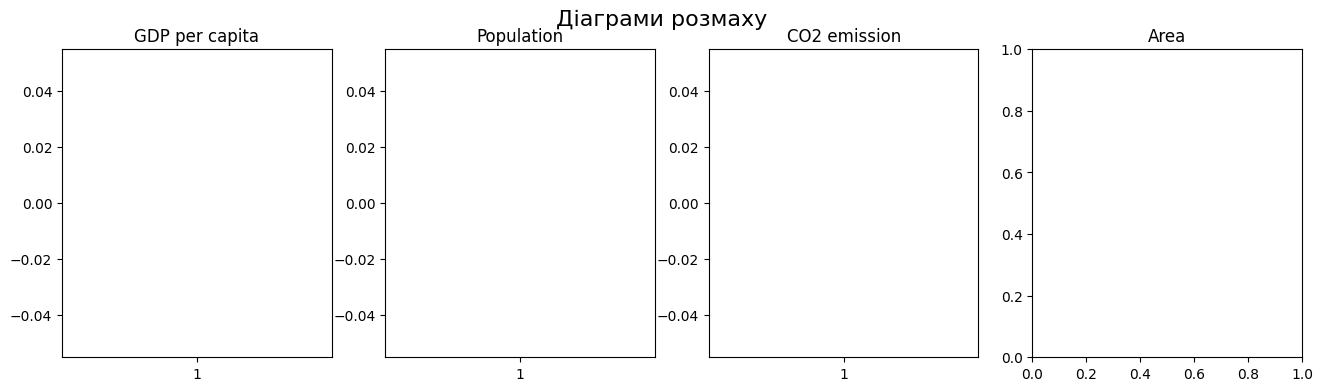

In [61]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pylab as plt

# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #4: </h2>
<b>Проблема 4. Пропущені значення </b>
<p>Як найкраще заповнити пропуски підкажуть візуалізації з попереднього завдання.</p>
</div>


Заповнювати пропуски для ознаки такої-то буду таким-то способом, тому що ...

In [63]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
avg_GDP_per_capita = df['GDP per capita'].astype('float').mean(axis=0)
print("Average of GDP per capita:", avg_GDP_per_capita)

Average of GDP per capita: 13374.83316831


Досліджую структуру даних, чи всі пропуски заповнено


In [24]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print("Кількість пропущених значень:")
print(df.isnull().sum())

Кількість пропущених значень:
Country Name       0
Region             0
GDP per capita    27
Populatiion        1
CO2 emission      12
Area               0
dtype: int64


 <a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #5: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую по формулі такій-то і додам у стовпчик такий-то.


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


Збережіть дані у новий файл 'clean_data2.csv':


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.to_csv("Data2_New.csv", index=False)

<h2>Виконав студент групи ІП-хх  <br>Прізвище Ім'я</h2>
